#**EE769 Introduction to Machine Learning**

#Assignment 1: Gradient Descent, Linear Regression, and Regularization


**Template and Instructions**



1. Up to two people can team up, but only one should submit, and both should understand the entire code.
2. Every line of code should end in a comment explaining the line
3. It is recommended to solve the assignment in Google Colab.
Write your roll no.s separated by commas here: 17d070041, 18d070053
4. Write your names here: Tanmay Goyal, Kirti Agarwal
5. There are two parts to the assignment. In the Part 1, the code format has to be strictly followed to enable auto-grading. In the second part, you can be creative.
6. **You can discuss with other groups or refer to the internet without being penalized, but you cannot copy their code and modify it. Write every line of code and comment on your own.**

#**Part 1 begins ...**
**Instructions to be strictly followed:**

1. Do not add any code cells or markdown cells until the end of this part. Especially, do not change the blocks that say "TEST CASES, DO NOT CHANGE"
2. In all other cells only add code where it says "CODE HERE".
3. If you encounter any raise NotImplementedError() calls you may comment them out.

We cannot ensure correct grading if you change anything else, and you may be penalised for not following these instructions.

## Import Statements

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


## Normalize function 



In [ ]:
def Normalize(X): # Output should be a normalized data matrix of the same dimension
  '''
  Normalize all columns of X using mean and standard deviation
  '''
  # column wise (axis=0) mean of X
  v_means = np.mean(X, axis=0) # 1-D array of column means
  # column wise (axis=0) std_dev of X
  v_std_dev = np.std(X, axis=0) # 1-D array of column standard deviations

  # using numpy vectorized operations
  X_norm = (X- v_means)/v_std_dev

  return X_norm
    # raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - 1 dimensional array'''
#X=np.array([[1,2,3],[3,4,5],[7,8,9]])
X1=np.array([1,2,3])
np.testing.assert_array_almost_equal(Normalize(X1),np.array([-1.224,  0.      ,  1.224]),decimal=3)
''' case 2 - 2 dimensional array'''
X2=np.array([[4,7,6],[3,8,9],[5,11,10]])
np.testing.assert_array_almost_equal(Normalize(X2),np.array([[ 0.  , -0.980581, -1.372813],[-1.224745, -0.392232,  0.392232],[ 1.224745,  1.372813,  0.980581]]))
''' case 3 - 1 dimensional array with float'''
X3=np.array([5.5,6.7,3.2,6.7])
np.testing.assert_array_almost_equal(Normalize(X3),np.array([-0.017,  0.822, -1.627,  0.822]),decimal=3)

## Prediction Function

Given X and w, compute the predicted output. Do not forget to add 1's in X

In [ ]:
def Prediction (X, w): # Output should be a prediction vector y
  '''
  Compute Prediction given an input datamatrix X and weight vecor w. Output y = [X 1]w where 1 is a vector of all 1s 
  '''
  # X_bias = [X 1]
  # np.ones to construct a column matrix(N x 1) of ones, no of rows(N) = len(X)
  # np.concatenate to join the column matrix to X along the rows (axis = 1)
  X_bias = np.concatenate((X, np.ones((len(X), 1))), axis=1)

  # matrix dot product [X 1].w
  y = X_bias.dot(w) # (w acts as column vector)

  return y
    
  # raise NotImplementedError()


In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - Known input output matrix and weights 1'''
X1 = np.array([[3,2],[1,1]])
w1 = np.array([2,1,1]) 
np.testing.assert_array_equal(Prediction(X1,w1),np.array([9,4]))


## Loss Functions

Code the four  loss functions:

1. MSE loss is only for the error
2. MAE loss is only for the error
3. L2 loss is for MSE and L2 regularization, and can call MSE loss
4. L1 loss is for MSE and L1 regularization, and can call MSE loss

In [ ]:
def MSE_Loss (X, t, w, lamda =0): # Ouput should be a single number
  '''
  lamda=0 is a default argument to prevent errors if you pass lamda to a function that doesn't need it by mistake. 
  This allows us to call all loss functions with the same input format.
  
  You are encouraged read about default arguments by yourself online if you're not familiar.
  '''
  # call Prediction and store predictions in y
  y= Prediction(X,w)
  # calclulate error vector
  err = t-y
  # calc mean of err**2 (squared error)
  MSE = np.mean(err**2)
  return MSE

  # raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MSE_Loss(X,t,w),0.53,decimal=3)


In [ ]:
def MAE_Loss (X, t, w, lamda = 0): # Output should be a single number
  # call Prediction and store predictions in y
  y= Prediction(X,w)
  # calclulate error vector
  err = t-y
  # mean of absolute values of errors
  MAE = np.mean(np.absolute(err))
  return MAE
    # raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MAE_Loss(X,t,w),0.700,decimal=3)


In [ ]:
def L2_Loss (X, t, w, lamda): # Output should be a single number based on L2-norm (with sqrt)
  ''' Need to specify what inputs are'''
  # L2_Loss = MSE + lamda * (L2_norm of w[:-1](slicing to exclude bias term))
  # np.linalg.norm calculates L2_norm by default for vectors
  MSE_L2 = MSE_Loss(X,t,w) + lamda*np.linalg.norm(w[:-1])
  return MSE_L2
  # raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L2_Loss(X,t,w,0.5),1.675,decimal=3)


In [ ]:
def L1_Loss (X, t, w, lamda): # Output should be a single number
  # L1_Loss = MSE + lamda * (L1_norm of w[:-1](slicing to exclude bias term))
  MSE_L1 = MSE_Loss(X,t,w) + lamda*np.linalg.norm(w[:-1], ord=1)
  return MSE_L1
  # raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L1_Loss(X,t,w,0.5),2.280,decimal=3)


In [ ]:
def NRMSE_Metric (X, t, w, lamda=0): # Output should be a single number. RMSE/std_dev(t)
  # Calc standard deviation of t
  t_std_dev = np.std(t)
  # Calc RMSE = sqrt(MSE)
  RMSE = np.sqrt(MSE_Loss(X,t,w))
  # Calc NRMSE = RMSE/(standard deviation of t)
  NRMSE = RMSE/t_std_dev

  return NRMSE
  # raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' Test case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(NRMSE_Metric(X,t,w,0.5),0.970,decimal=3)


## Gradient function
Each Loss function will have its own gradient function:

1. MSE gradient is only for the error
2. MAE gradient is only for the error
3. L2 gradient is for MSE and L2 regularization, and can call MSE gradient
4. L1 gradient is for MSE and L1 regularization, and can call MSE gradient

In [ ]:
def MSE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
  # Calc X_bias = [X 1] for calculations
  X_bias = np.concatenate((X, np.ones((len(X), 1))), axis=1)
  # MSE_grad = (2/len(X))*(w.X_bias'.X_bias - t.X_bias)
  # (t,w act as Row vector)
  MSE_grad = (2/len(X))*(w.dot(X_bias.transpose().dot(X_bias)) - t.dot(X_bias))
  return MSE_grad
  # raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MSE_Gradient(X,t,w),np.array([2.55, 2.94, 2.9 , 0.4 ]),decimal=3)


In [ ]:
def MAE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
  # Call Prediction() and store predictions in y
  y = Prediction(X,w)
  # Calc error vector
  err = t - y
  # Compute X_bias = [X 1] for calculations
  X_bias = np.concatenate((X, np.ones((len(X), 1))), axis=1)
  # MAE_grad[i] = signum(err).(-X[:,i])/len(X) 
  # MAE_grad = -signum(err).X_bias/len(X); (err act as row vector)
  MAE_grad = -np.sign(err).dot(X_bias)/len(X)
  return MAE_grad
  # raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MAE_Gradient(X,t,w),np.array([0.75,  0.3 ,  0.5 , 0.]),decimal=3)


In [ ]:
def L2_Gradient (X, t, w, lamda): # Output should have the same size as w
  # store MSE_Gradient in MSE_grad
  MSE_grad = MSE_Gradient(X,t,w)
  # Calc L2_regulizer gradient = lamda*(1/L2_norm(w[:-1]))*np.append(w[:-1],0)
  # np.append(w[:-1],0) since L2_norm gradient wrt bias weight is zero
  L2_reg_grad = (lamda/np.linalg.norm(w[:-1]))*np.append(w[:-1], 0)
  # calc L2_gradient = MSE_grad + L2_reg_grad
  L2_grad = MSE_grad + L2_reg_grad
  return L2_grad
  # raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L2_Gradient(X,t,w,0.5),np.array([2.986, 2.721, 3.009 , 0.4 ]),decimal=3)


In [ ]:
def L1_Gradient (X, t, w, lamda): # Output should have the same size as w
  # store MSE_Gradient in MSE_grad
  MSE_grad = MSE_Gradient(X,t,w)
  # Calc L1_regulizer gradient = lamda* sign(np.append(w[:-1],0))
  # np.append(w[:-1],0) since L1_norm gradient wrt bias weight is zero
  L1_reg_grad = lamda*np.sign(np.append(w[:-1], 0))
  # calc L1_gradient = MSE_grad + L1_reg_grad
  L1_grad = MSE_grad + L1_reg_grad
  return L1_grad
  # raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L1_Gradient(X,t,w,0.5),np.array([3.05, 2.44, 3.4 , 0.4 ]),decimal=3)


## Gradient Descent Function


In [ ]:
def Gradient_Descent (X, X_val, t, t_val, w, lamda, max_iter, epsilon, lr, lossfunc, gradfunc): # See output format in 'return' statement
  # initialize count -> no of iterations as 0
  # delta -> current loss - loss after one step
  # initialize delta as anything>=epsilon for first iteration
  count, delta = 0, epsilon
  # w_pre -> current weight vector
  # w_post -> weight vector after one step
  # initialize w_pre with given weight vector w
  w_pre = w
  # calc loss_pre for w_pre
  loss_pre = lossfunc(X, t, w_pre, lamda)
  # start the while loop for further iterations of gradient descent
  # loop breaks if count exceeds max_iter
  # or delta is less than epsilon
  while (count <= max_iter) and  (delta >= epsilon):
    # perform one step of gradient descent
    # w_post = w_pre - learning_rate * (gradient at w_pre)
    w_post = w_pre - lr*gradfunc(X, t, w_pre, lamda)
    # calc loss_post as loss for w_post
    loss_post = lossfunc(X, t, w_post, lamda)
    # update delta as loss_pre - loss_post
    delta = abs(loss_pre - loss_post)
    # update variables for next iteration
    # w_post will now be w_pre
    w_pre = w_post
    # loss_post will now be loss_pre
    loss_pre = loss_post
    # increment no of iterations by 1
    count += 1
  

  # w_pre now holds the final weight vector
  # assign w_pre to w_final
  w_final = w_pre
  # Calculate training loss with w_final
  train_loss_final = lossfunc(X, t, w_final, lamda)
  # Calculate validation loss with w_final
  validation_loss_final = lossfunc(X_val, t_val, w_final, lamda)
  # Calculate validation NRMSE with w_final
  validation_NRMSE = NRMSE_Metric(X_val, t_val, w_final)
    
  return w_final, train_loss_final, validation_loss_final, validation_NRMSE #You should return variables structured like this.
  # raise NotImplementedError() 

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
X=np.array([[23,24],[1,2]])
t=np.array([4,5])
X_val=np.array([[3,4],[5,6]])
t_val=np.array([3,4])
w=np.array([3,2,1])
results =Gradient_Descent (X, X_val, t, t_val, w, 0.1, 100, 1e-10, 1e-5, L2_Loss,L2_Gradient) 
np.testing.assert_allclose([results[1]],[697.919],rtol =0.05)
np.testing.assert_allclose([results[2]],[20],atol=5) # we expect around 17.5  but some students got 24 which we will also accept
#Instructor Values of results[1] and results [2] are 697.919 and 17.512 respectively

## Pseudo Inverse Method

You have to implement a slightly more advanced version, with L2 penalty:

w = (X' X + lambda I)^(-1) X' t.

See, for example: Section 2 of https://web.mit.edu/zoya/www/linearRegression.pdf

Here, the column of 1's in assumed to be included in X

In [ ]:
def Pseudo_Inverse (X, t, lamda): # Output should be weight vector
  # compute X_bias = [X 1] for calculations
  X_bias = np.concatenate((X, np.ones((len(X), 1))), axis=1)
  # compute transpose of X_bias
  X_biasT = X_bias.transpose()
  # compute lamda * I, I -> Identity matrix of order X_bias.shape[1]
  # since X_biasT.X_bias is a square matrix with order X_bias.shape[1]
  lamda_I = lamda*np.eye(X_bias.shape[1])
  # Calculate pseudo_inv with L2 penalty as (X_biasT.X_bias + lamda*I)^(-1).X_biasT
  pseudo_inv_L2 = np.linalg.inv(X_biasT.dot(X_bias) + lamda_I).dot(X_biasT)
  # calculate w as pseudo_inv_L2.t
  # (t acts as a column vector here)
  w = pseudo_inv_L2.dot(t)
  
  return w
  # raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - other data'''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
np.testing.assert_array_almost_equal(Pseudo_Inverse(X,t,0.5),np.array([ 0.491,  0.183,  0.319, -0.002]),decimal=3)

#... Part 1 ends Below this you be more creative. Just comment out the lines where you save files (e.g. test predictions).

#**Part 2 begins ...**

**Instructions to be loosely followed (except number 8):**

1. Add more code and text cells between this and the last cell.
2. Read training data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv only. Do not use a local copy of the dataset.
3. Find the best lamda for **MSE+lamda*L2(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
4. Find the best lamda for **MSE+lamda*L1(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
5. Find the best lamda for the **pseudo-inv method**. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
6. Write your observations and conclusions.
7. Read test data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv only. Do not use a local copy of the dataset. Predict its dependent (missing last column) using the model with the lowest MSE, RMSE, or NRMSE. Save it as a file RollNo1_RollNo2_1.csv.
8. **Disable the prediction csv file saving statement and submit this entire .ipynb file, .py file, and .csv file as a single RollNo1_RollNo2_1.zip file.**


## Data Reading and pre-processing

In [ ]:
# read training data from the given link
df_train = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv")

In [ ]:
# separate the independent variables [first 17 columns]
# and the target (dependent) variable [last column]
x = np.array(df_train.iloc[:,:-1])
t = np.array(df_train.iloc[:,-1])

# normalize the data matrix of independent variables
x_norm = Normalize(x)

In [ ]:
# 85-15 split for training-validation
# for np.split(), 2nd argument is a list of points
# at which the split has to be done, we only need one split
# int(0.85*len(x_raw)) refers to the row index roughly 85% of the total no. of rows
x_train, x_val = np.split(x_norm, [int(0.85*len(x))])
t_train, t_val = np.split(t, [int(0.85*len(x))])

* Now we have separate training(x_train, t_train) and validation(x_val, t_val) dataset.
* Proceed ahead for training and validation to find the best set of parameters w. 

# Training and Validation

---

Goal : To find an optimum weight vector (model) with least validation RMSE.

Process : 

*   To train the Linear regression model for L2 and L1 regularized loss functions.
*   Optimization (Parameter Tuning) problem boiled down to minimizing the loss functions. We use Gradient descent algorithm for minimization.
*   Then we tune the hyperparameter lamda by literally putting to test the optimum w obtained from various lamda against the validation data and plotting the RMSE vs 1/lamda curve. 
*   For both  L1 and L2 loss, we obtain the best lamda and thus corresponding optimum solutions for the weight vector, i.e. the model parameters.
*   Then we use the pseudo inverse method, i.e., the analytical solution for minima of L2 loss functions with respect to w. This is in contrast to using the gradient descent algorithm for finding the minima.
* Again we tune the hyperparameter lamda to obtain the best performing model.
* Now out of all the 3 optimal model choices, we choose the model with best validation RMSE and make predictions given the test data.
* These are then saved into a csv file.

## Optimal model parameters using ***L2 Loss***
---


* Optimization problem -> ***minimize the loss function.***
* Optimization algorithm -> ***Gradient Descent***

### Setting up **Gradient Descent** (**max_iter, epsilon and lr**)
* Follwing we perform an experiment to fix upon the stopping criteria, max no. of iterations and learning rate.
* **Rough Design** : 
* Three values of lamda, 0, 0.5 and 1 will be used to finalize the parameters.
* Start with conducting the experiment for lamda = 0, take max_iter = 1000 and epsilon = 1e-5 to start with
* vary the learning rate, epsilon, max_iter to obtain a nicely performing gradient descent optimizer.
* Repeat the same for lamda =1, then lamda = 0.5
* Validate that the final parameter choices work well for all three values of lamda

#### Modify the original Gradient Descent function
Making a slightly modified copy of the original gradient descent function for better analysis.
* Validation data is removed form input
* Output is modified to print number of iterations, absolute change in loss in the last iteration and the final training loss.

In [ ]:
def Gradient_Descent_modified (X, t, w, lamda, max_iter, epsilon, lr, lossfunc, gradfunc): # See output format in 'return' statement
  # input/output modified
  # rest same as original grad descent function
  # for comments and description refer to original grad descent
  # implementation in part 1

  count, delta = 0, epsilon
  w_pre = w
  loss_pre = lossfunc(X, t, w_pre, lamda)

  while (count <= max_iter) and  (delta >= epsilon):
    w_post = w_pre - lr*gradfunc(X, t, w_pre, lamda)
    loss_post = lossfunc(X, t, w_post, lamda)
    delta = abs(loss_pre - loss_post)
    w_pre = w_post
    loss_pre = loss_post
    count += 1
  
  w_final = w_pre
  train_loss_final = loss_post
  # print delta, count and final loss
  print('count = ', count-1)
  print('delta = ', delta)
  print('minimum loss = ', loss_post,'\n')

  return None

### Experiments for Gradient Descent for L2 Loss

In [ ]:
# randomly initialize w as w_init
# from uniform distribution over [0,1) 
w_init = np.random.rand(x.shape[1]+1)

In [ ]:
lr_arr = [0.05, 0.1, 0.13, 0.15, 0.17, 0.19, 0.22]
for lr in lr_arr:
  Gradient_Descent_modified (x_train, t_train, w_init, 0, 1000, 1e-5, lr, L2_Loss, L2_Gradient)

count =  417
delta =  9.979740802412707e-06
minimum loss =  1.9559830424629316 

count =  236
delta =  9.837796150380385e-06
minimum loss =  1.9555763144439489 

count =  189
delta =  9.9133075728286e-06
minimum loss =  1.9554868104001957 

count =  168
delta =  9.689812418223198e-06
minimum loss =  1.955439763442426 

count =  151
delta =  9.678936210288924e-06
minimum loss =  1.955408706243508 

count =  137
delta =  9.797114103315963e-06
minimum loss =  1.9553868344510497 

count =  1000
delta =  5.93538096426019e+115
minimum loss =  2.5450451973919326e+116 



Observing the trend in the minimum loss functions, safe choice for learning rate seems to be 0.17.

Now we will decrease epsilon to improve the descent even further

In [ ]:
# learning rate = 0.19
eps_arr = [1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
for eps in eps_arr:
  Gradient_Descent_modified (x_train, t_train, w_init, 0, 1000, eps, 0.17, L2_Loss, L2_Gradient)

count =  151
delta =  9.678936210288924e-06
minimum loss =  1.955408706243508 

count =  205
delta =  9.89249670402259e-07
minimum loss =  1.9552074217644515 

count =  260
delta =  9.724915939202106e-08
minimum loss =  1.9551867162204886 

count =  314
delta =  9.974524317613032e-09
minimum loss =  1.9551846900252234 

count =  369
delta =  9.808269751943044e-10
minimum loss =  1.9551844812221475 

count =  424
delta =  9.644773868444645e-11
minimum loss =  1.955184460689861 



Apparently, there is no significant improvement in performance for lower values of epsilon and considering the increase in number of iterations for lower epsilon, 
a good and safe choice can be 1e-8

So far, max_iter = 1000, epsilon = 1e-8, learning rate = 0.17. Now we test and tweak this for lamda = 1

In [ ]:
Gradient_Descent_modified (x_train, t_train, w_init, 1, 1000, 1e-8, 0.17, L2_Loss, L2_Gradient)

count =  51
delta =  7.926496792265425e-09
minimum loss =  3.5977930000677656 



In [ ]:
# try for a variety of learning rates
lr_arr = [0.25, 0.22, 0.19, 0.17, 0.15, 0.1, 0.05, 0.01]
for lr in lr_arr:
  Gradient_Descent_modified (x_train, t_train, w_init, 1, 1000, 1e-8, lr, L2_Loss, L2_Gradient)

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


count =  970
delta =  nan
minimum loss =  inf 

count =  1000
delta =  1.5717758817721808e+116
minimum loss =  6.739652742373488e+116 

count =  167
delta =  9.487476582137333e-09
minimum loss =  3.597793064304 

count =  51
delta =  7.926496792265425e-09
minimum loss =  3.5977930000677656 

count =  58
delta =  7.65713270567403e-09
minimum loss =  3.597793002594001 

count =  86
delta =  9.311230897424139e-09
minimum loss =  3.5977930228761554 

count =  169
delta =  9.05446517762698e-09
minimum loss =  3.5977930678073164 

count =  773
delta =  9.97921034695537e-09
minimum loss =  3.59779347732478 



Observation : Observe the final minimum loss. Increasing the learning rate decreases the performance, while decreasing the learning rate doesn't cause any significant change in the performance. 

Now Let's see if there is any improvement if we increase number of iterations to 5000

In [ ]:
# increase max_iter to 5000
lr_arr = [0.22, 0.19, 0.17, 0.15, 0.1, 0.05, 0.01]
for lr in lr_arr:
  Gradient_Descent_modified (x_train, t_train, w_init, 1, 5000, 1e-8, lr, L2_Loss, L2_Gradient)

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


count =  2629
delta =  nan
minimum loss =  inf 

count =  167
delta =  9.487476582137333e-09
minimum loss =  3.597793064304 

count =  51
delta =  7.926496792265425e-09
minimum loss =  3.5977930000677656 

count =  58
delta =  7.65713270567403e-09
minimum loss =  3.597793002594001 

count =  86
delta =  9.311230897424139e-09
minimum loss =  3.5977930228761554 

count =  169
delta =  9.05446517762698e-09
minimum loss =  3.5977930678073164 

count =  773
delta =  9.97921034695537e-09
minimum loss =  3.59779347732478 



There is no improvement by increasing the max_iter to 5000 for any learning rate. Clearly, our choice for learning rate = 0.17 works very well for lamda=1.
 
Let's try a lower value of max_iter, say 500. Maybe we can make do with lower value of max_iter, this will make training faster

In [ ]:
# max_iter = 500
Gradient_Descent_modified (x_train, t_train, w_init, 1, 500, 1e-8, 0.17, L2_Loss, L2_Gradient)

count =  51
delta =  7.926496792265425e-09
minimum loss =  3.5977930000677656 



There is no significant depreciation in performance. So lets fix on max_iter=500, epsilon= 1e-8, and lr= 0.17

Let's validate this new setting for lamda=0

In [ ]:
Gradient_Descent_modified (x_train, t_train, w_init, 0, 500, 1e-8, 0.17, L2_Loss, L2_Gradient)

count =  319
delta =  9.840431136609595e-09
minimum loss =  1.955184686912187 



It works as the minimum loss is almost same as best obtained before. Now as the final step, let's validate our parameters by repeating the above experiment for a middle value of lamda say lamda = 0.5

In [ ]:
# repeat the same for lamda = 0.5
lr_arr = [0.22, 0.19, 0.17, 0.15, 0.1, 0.05, 0.01]
for lr in lr_arr:
  Gradient_Descent_modified (x_train, t_train, w_init, 0.5, 1000, 1e-8, lr, L2_Loss, L2_Gradient)

count =  1000
delta =  8.852450190821168e+115
minimum loss =  3.795861795386697e+116 

count =  88
delta =  8.812418794690302e-09
minimum loss =  2.8758435174433457 

count =  91
delta =  9.093730213294293e-09
minimum loss =  2.875843533822543 

count =  102
delta =  9.98255522688396e-09
minimum loss =  2.875843548375216 

count =  151
delta =  9.269195633265781e-09
minimum loss =  2.8758435792376886 

count =  288
delta =  9.83553016808969e-09
minimum loss =  2.875843698549965 

count =  1000
delta =  1.2331211518556984e-07
minimum loss =  2.8758564714424883 



In [ ]:
# max_iter = 5000
Gradient_Descent_modified (x_train, t_train, w_init, 0.5, 5000, 1e-8, 0.17, L2_Loss, L2_Gradient)

count =  91
delta =  9.093730213294293e-09
minimum loss =  2.875843533822543 



In [ ]:
# max_iter = 500
Gradient_Descent_modified (x_train, t_train, w_init, 0.5, 500, 1e-8, 0.17, L2_Loss, L2_Gradient)

count =  91
delta =  9.093730213294293e-09
minimum loss =  2.875843533822543 



**Observation** : 
* Clearly, our parameter choices work well enough for lamda = 0.5 as well. We tried searching for better parameters for this lamda, but as it turns out, our initial choice works just fine.



### **Final Gradient Descent Parameters** 

So the final choices are as follows:
* Learning Rate (lr)  = 0.17
* Maximum iterations (max_iter) = 500
* Epsilon =  1e-8

### ***Hyperparameter Tuning***
---



* Plotting Validation RMSE vs 1/lamda
* Intial range of 1/lamda : 1 to 1000, 100 values

In [ ]:
## This cell takes around 30-40s to execute

# Here on, we use the original gradient descent function.
# define initial range for 1/lamda from 1 to 1000
# and observe the validation rmse plot.
lamda_inv = np.linspace(1, 1000, 100)
Val_RMSE, Train_RMSE = [], []
for l_inv in lamda_inv:
  w_init = np.random.rand(x.shape[1]+1)
  # run gradient descent and store resulting w in w_op (w optimal)
  w_op = Gradient_Descent(x_train, x_val, t_train, t_val, w_init, 1/l_inv, 500, 1e-8, 0.17, L2_Loss, L2_Gradient)[0]
  # calc validation rmse and training rmse
  Val_RMSE.append(np.sqrt(MSE_Loss(x_val, t_val, w_op)))
  Train_RMSE.append(np.sqrt(MSE_Loss(x_train, t_train, w_op)))

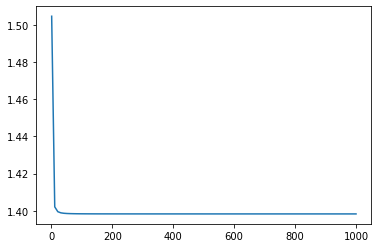

In [ ]:
plt.plot(lamda_inv, Train_RMSE)
plt.show()

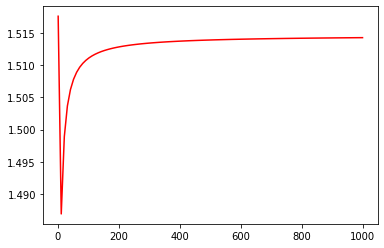

In [ ]:
plt.plot(lamda_inv, Val_RMSE, color='red')
plt.show()

We observe a clear minima. Let's go ahead, calculate the same and store it for future reference.

In [ ]:
lamda_inv_min = lamda_inv[np.argmin(Val_RMSE)]
val_rmse_min = np.min(Val_RMSE)
print('1/lamda at minima = ', lamda_inv_min)
print('Minimum Validation RMSE = ', val_rmse_min)

1/lamda at minima =  11.090909090909092
Minimum Validation RMSE =  1.4868970623899997


Now although we have got a clear minima, just to be on the safe side, and ensure that it is indeed a global minima, let's observe the validation rmse curve for a very wide range of 1/lamda.

Let's choose the range as 100 to 1e+8

In [ ]:
lamda_inv = np.linspace(100, 1e+8, 50)
Val_RMSE, Train_RMSE = [], []
for l_inv in lamda_inv:
  w_init = np.random.rand(x.shape[1]+1)
  # run gradient descent and store resulting w in w_op (w optimal)
  w_op = Gradient_Descent(x_train, x_val, t_train, t_val, w_init, 1/l_inv, 500, 1e-8, 0.17, L2_Loss, L2_Gradient)[0]
  # calc validation rmse and training rmse
  Val_RMSE.append(np.sqrt(MSE_Loss(x_val, t_val, w_op)))
  # Train_RMSE.append(np.sqrt(MSE_Loss(x_train, t_train, w_op)))

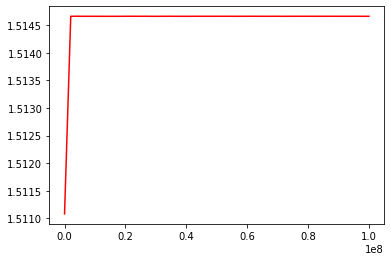

In [ ]:
plt.plot(lamda_inv, Val_RMSE, color='red')
plt.show()

Clearly, we had observed a global minima in the previous step.

### **Conclusion**

Thus best lambda for **L2 Loss** is approximately 1/11.091 = 0.09
with validation rmse alround 1.487


In [ ]:
# print the optimum weight vector for L2_Loss
lamda_best_L2 = 1/lamda_inv_min
w_best_L2 = Gradient_Descent(x_train, x_val, t_train, t_val, w_init, lamda_best_L2, 500, 1e-8, 0.17, L2_Loss, L2_Gradient)[0]
best_val_RMSE_L2 = np.sqrt(MSE_Loss(x_val, t_val, w_best_L2))
best_val_NRMSE_L2 = NRMSE_Metric(x_val, t_val, w_best_L2)
print('optimum w :\n', w_best_L2)
print('\nValidation RMSE : ', best_val_RMSE_L2)
print('Validation NRMSE : ', best_val_NRMSE_L2)

optimum w :
 [ 4.29033189e-01  9.04722365e-02  3.24134149e-01 -1.16341297e-01
  1.76576738e+00  3.09033646e-01 -3.69301909e-01  2.73989734e-01
 -4.07237641e-01 -1.40847661e-01 -1.71715910e-01 -2.84663483e-01
 -7.87267597e-02  1.98171486e-01 -2.07006498e-02  1.40551803e-02
 -6.45385099e-02 -1.14324806e-01 -2.16901519e-01  2.71089441e-01
  1.25517729e-01  3.02231732e+01]

Validation RMSE :  1.4868967181750952
Validation NRMSE :  0.3951728816170014


## Optimal model parameters using **L1 Loss**
* Optimization problem -> ***minimize the loss function.***
* Optimization algorithm -> ***Gradient Descent***

### Setting up **Gradient Descent** (**max_iter, epsilon and lr**)
* Follwing we perform an experiment to fix upon the stopping criteria, max no. of iterations and learning rate.
* **Design** : Take off from last section from the result for lamda = 0 as L1_Loss and L2_Loss are same for lamda = 0.
* Tweak learning rate, epsilon and max_iter for lamda as 1 to obtain the final values.

### Experiments for Gradient Descent for L1 Loss

In [ ]:
# randomly initialize w as w_init
# from uniform distribution over [0,1) 
w_init = np.random.rand(x.shape[1]+1)

In [ ]:
# with learning rate and 
Gradient_Descent_modified (x_train, t_train, w_init, 1, 1000, 1e-8, 0.17, L1_Loss, L1_Gradient)

count =  1000
delta =  2.8315282379121705
minimum loss =  20.911986809541116 



In [ ]:
# let's try for variety of learning rates
lr_arr = [0.23, 0.21, 0.19, 0.17, 0.15, 0.1, 0.05, 0.01]
for lr in lr_arr:
  Gradient_Descent_modified (x_train, t_train, w_init, 1, 1000, 1e-8, lr, L1_Loss, L1_Gradient)

count =  1000
delta =  1.092223092617715e+188
minimum loss =  3.129956910080877e+188 

count =  1000
delta =  1.2294887468771121e+40
minimum loss =  1.4703753543902869e+41 

count =  1000
delta =  4.449907428140264
minimum loss =  117.56730490618553 

count =  1000
delta =  2.8315282379121705
minimum loss =  20.911986809541116 

count =  1000
delta =  1.681793769097677
minimum loss =  9.42286735904564 

count =  1000
delta =  0.3528163922068419
minimum loss =  5.909340322138258 

count =  1000
delta =  0.15582292989512148
minimum loss =  5.356285982004833 

count =  1000
delta =  0.021277999152600202
minimum loss =  5.017060879279802 



Observing the trend in minimum losses above, it seems best to go with learning rate = 0.21 as it gives minimum loss. It is also observed that lowering the learning rates below 0.17 clearly improves performance.

Let's hold onto that observation and explore it further if 0.21 doesn't perform well for lamda = 0 and 0.5

In [ ]:
# try lr = 0.21 for lamda = 0 and 0.5
# lamda = 0
Gradient_Descent_modified (x_train, t_train, w_init, 0, 1000, 1e-8, 0.21, L1_Loss, L1_Gradient)
# lamda = 0.5
Gradient_Descent_modified (x_train, t_train, w_init, 0.5, 1000, 1e-8, 0.21, L1_Loss, L1_Gradient)

count =  1000
delta =  1.1735933409459498e+38
minimum loss =  1.4035286853877655e+39 

count =  1000
delta =  3.679809918364251e+39
minimum loss =  4.400773757829708e+40 



Observation : minimum loss acheived for lamda = 0 and 0.5 shoots off to very large values at this rate.

Clearly, we need to get back to that thought and explore lower learning rates further.



In [ ]:
# try for lower learning rates
lr_arr = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005]
for lr in lr_arr:
  Gradient_Descent_modified (x_train, t_train, w_init, 1, 1000, 1e-8, lr, L1_Loss, L1_Gradient)

count =  1000
delta =  0.3528163922068419
minimum loss =  5.909340322138258 

count =  1000
delta =  0.15582292989512148
minimum loss =  5.356285982004833 

count =  1000
delta =  0.021277999152600202
minimum loss =  5.017060879279802 

count =  1000
delta =  0.009021724243903684
minimum loss =  4.978974231234468 

count =  1000
delta =  0.06830173710321219
minimum loss =  22.79825710044705 

count =  1000
delta =  0.22868564197472097
minimum loss =  123.67259859213863 



Learning rate of 0.01 seems to be the best choice here. We could go for 0.005 but there is really only a slight improvement. This doesn't seem worth going for such a slow learning rate.

Next for learning rate of 0.01, increase/decrease max_iter to see the effect on performance.

In [ ]:
# max_iter = 5000
Gradient_Descent_modified (x_train, t_train, w_init, 1, 5000, 1e-8, 0.01, L1_Loss, L1_Gradient)

count =  5000
delta =  0.014952461987906673
minimum loss =  4.993727341141227 



In [ ]:
# max_iter = 500
Gradient_Descent_modified (x_train, t_train, w_init, 1, 500, 1e-8, 0.01, L1_Loss, L1_Gradient)

count =  500
delta =  0.031370487269527736
minimum loss =  5.023748550786248 



For max_iter = 5000, there is not any significant improvement and for max_iter= 500, there isn't any significant depreciation in performance.

So we finalize max_iter = 500 for now.

Now, let's validate our choice for lamda = 0 and 0.5

In [ ]:
# try max_iter=500, lr= 0.01 for lamda = 0 and 0.5
# lamda = 0
Gradient_Descent_modified (x_train, t_train, w_init, 0, 500, 1e-8, 0.01, L1_Loss, L1_Gradient)
# lamda = 0.5
Gradient_Descent_modified (x_train, t_train, w_init, 0.5, 500, 1e-8, 0.01, L1_Loss, L1_Gradient)

count =  500
delta =  0.00019486020415282468
minimum loss =  2.0069936384928164 

count =  500
delta =  0.001966806723394665
minimum loss =  3.7786215339103486 



As compared to the values for minimum loss achieved before, 1.95 and 3.59 respectively, although there is slight depreciation, but again it isn't really very significant.

But still to be on the safe side, let's increase the max_iter bound to 1000.

In [ ]:
# try max_iter=500, lr= 0.01 for lamda = 0 and 0.5
# lamda = 0
Gradient_Descent_modified (x_train, t_train, w_init, 0, 1000, 1e-8, 0.01, L1_Loss, L1_Gradient)
# lamda = 0.5
Gradient_Descent_modified (x_train, t_train, w_init, 0.5, 1000, 1e-8, 0.01, L1_Loss, L1_Gradient)

count =  1000
delta =  3.0211561095283557e-05
minimum loss =  1.9661075283750529 

count =  1000
delta =  0.005287759540400394
minimum loss =  3.7634055300173266 



So our final values of parameters of gradient descent are as follows.

### **Final Gradient Descent Parameters**
* Learning Rate (lr)  = 0.01
* Maximum iterations (max_iter) = 1000
* Epsilon =  1e-8

### ***Hyperparameter Tuning***

---

* Plotting Validation RMSE vs 1/lamda
* Intial range of 1/lamda : 10 to 1000, 100 values

In [ ]:
# define initial range for 1/lamda from 1 to 1000
# and observe the validation rmse plot.
lamda_inv = np.linspace(1, 1000, 100)
Val_RMSE, Train_RMSE = [], []
for l_inv in lamda_inv:
  w_init = np.random.rand(x.shape[1]+1)
  # run gradient descent and store resulting w in w_op (w optimal)
  w_op = Gradient_Descent(x_train, x_val, t_train, t_val, w_init, 1/l_inv, 1000, 1e-8, 0.01, L1_Loss, L1_Gradient)[0]
  # calc validation rmse and training rmse
  Val_RMSE.append(np.sqrt(MSE_Loss(x_val, t_val, w_op)))
  Train_RMSE.append(np.sqrt(MSE_Loss(x_train, t_train, w_op)))

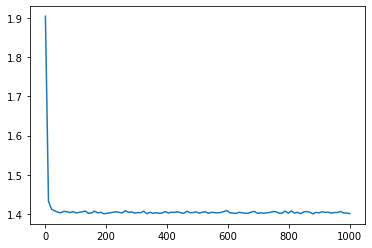

In [ ]:
plt.plot(lamda_inv, Train_RMSE)
plt.show()

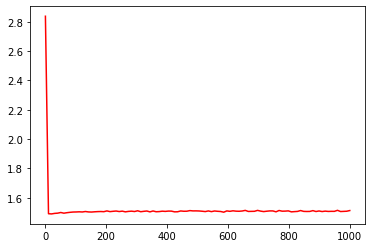

In [ ]:
plt.plot(lamda_inv, Val_RMSE, color='red')
plt.show()

On closely observing the validation rmse curve, it seems like the minima occurs somewhere close to the starting point of the range of 1/lamda plotted.

Let's zoom in to that range on the validation rmse curve.
 Use lamda_inv range as 5 to 800.

In [ ]:
## NOTE : this cell takes around 1m to execute

lamda_inv = np.linspace(5, 800, 50)
Val_RMSE, Train_RMSE = [], []
for l_inv in lamda_inv:
  w_init = np.random.rand(x.shape[1]+1)
  # run gradient descent and store resulting w in w_op (w optimal)
  w_op = Gradient_Descent(x_train, x_val, t_train, t_val, w_init, 1/l_inv, 1000, 1e-8, 0.01, L1_Loss, L1_Gradient)[0]
  # calc validation rmse and training rmse
  Val_RMSE.append(np.sqrt(MSE_Loss(x_val, t_val, w_op)))
  # Train_RMSE.append(np.sqrt(MSE_Loss(x_train, t_train, w_op)))

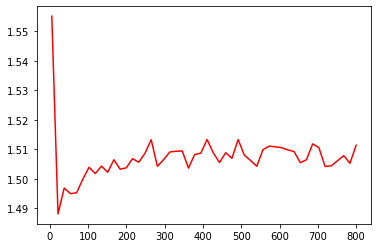

In [ ]:
plt.plot(lamda_inv, Val_RMSE, color='red')
plt.show()

We observe a clear minima. Let's go ahead, calculate the same and store it for future reference.

In [ ]:
lamda_inv_min = lamda_inv[np.argmin(Val_RMSE)]
val_rmse_min = np.min(Val_RMSE)
print('1/lamda at minima = ', lamda_inv_min)
print('Minimum Validation RMSE = ', val_rmse_min)

1/lamda at minima =  21.224489795918366
Minimum Validation RMSE =  1.488102186382294


Now although we have got a clear minima, just to be on the safe side, and ensure that it is indeed a global minima, let's observe the validation rmse curve for a very wide range of 1/lamda.

Let's choose the range as 100 to 1e+8

In [ ]:
## NOTE : This Cell Takes around 1m 40s to execute

lamda_inv = np.linspace(20, 1e+6, 100)
Val_RMSE, Train_RMSE = [], []
for l_inv in lamda_inv:
  w_init = np.random.rand(x.shape[1]+1)
  # run gradient descent and store resulting w in w_op (w optimal)
  w_op = Gradient_Descent(x_train, x_val, t_train, t_val, w_init, 1/l_inv, 1000, 1e-8, 0.01, L1_Loss, L1_Gradient)[0]
  # calc validation rmse and training rmse
  Val_RMSE.append(np.sqrt(MSE_Loss(x_val, t_val, w_op)))
  # Train_RMSE.append(np.sqrt(MSE_Loss(x_train, t_train, w_op)))

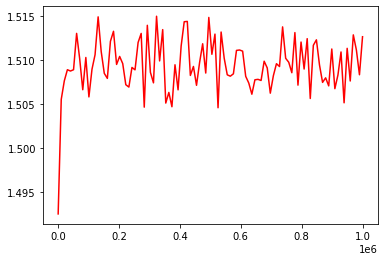

In [ ]:
plt.plot(lamda_inv, Val_RMSE, color='red')
plt.show()

It can be clearly observed that the curve increases and saturates around a certain value and doesn't show any potential monotonically decreasing nature even for such a wide range of 1/lamda.

Thus, the minima observed in the last run, is indeed a global minima.

### **Conclusion**
Thus best lambda for **L1 Loss** is approximately 1/21.224 = 0.047
with validation rmse around 1.488

In [ ]:
# save and print the final weight vector, validation rmse and nrmse for L1_Loss
lamda_best_L1 = 1/lamda_inv_min
w_best_L1 = Gradient_Descent(x_train, x_val, t_train, t_val, w_init, lamda_best_L1, 1000, 1e-8, 0.01, L1_Loss, L1_Gradient)[0]
best_val_RMSE_L1 = np.sqrt(MSE_Loss(x_val, t_val, w_best_L1))
best_val_NRMSE_L1 = NRMSE_Metric(x_val, t_val, w_best_L1)
print('optimum w :\n', w_best_L1)
print('\nValidation RMSE : ', best_val_RMSE_L1)
print('Validation NRMSE : ', best_val_NRMSE_L1)

optimum w :
 [ 4.07122041e-01  4.83618127e-02  1.09909200e-01 -2.22591615e-02
  1.71259343e+00  3.97673603e-01 -3.29580660e-01  2.66778791e-01
 -4.60139011e-01 -2.97238505e-02 -1.01781970e-01 -2.76571024e-01
 -4.26396135e-02  1.55575020e-01 -4.04807761e-04 -5.29611900e-04
 -3.99480144e-02 -1.09674155e-01 -1.60334430e-01  2.10100321e-01
  1.10351000e-01  3.02150390e+01]

Validation RMSE :  1.4920337107441677
Validation NRMSE :  0.3965381413095892


## **Pseudo-inverse Method for L2 Loss**

This method gives the exact solution for minima of the L2 Loss function. Uptil now, we used gradient descent algorithm to estimate the minima of the loss function. 



### Hyperparameter Tuning
* Plotting Validation RMSE vs 1/lamda
* Intial range of 1/lamda : 1 to 1000, 200 values

In [ ]:
lamda_inv = np.linspace(1, 100, 50)
Val_RMSE, Train_RMSE = [], []
for l_inv in lamda_inv:
  # calculate optimum w using Pseudo_Inverse method
  w_op = Pseudo_Inverse (x_train, t_train, 1/l_inv)
  # calc validation rmse and training rmse
  Val_RMSE.append(np.sqrt(MSE_Loss(x_val, t_val, w_op)))
  Train_RMSE.append(np.sqrt(MSE_Loss(x_train, t_train, w_op)))

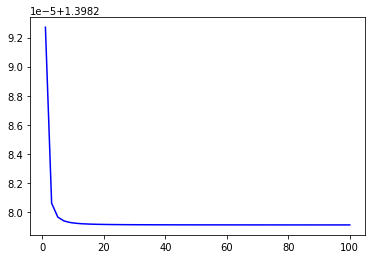

In [ ]:
plt.plot(lamda_inv, Train_RMSE, color='blue')
plt.show()

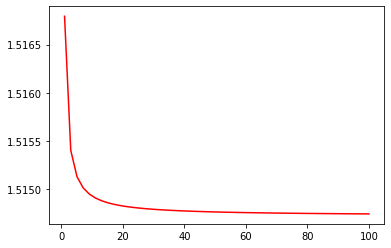

In [ ]:
plt.plot(lamda_inv, Val_RMSE, color='red')
plt.show()

Clearly, there is no hint of any minima in the curve above.

Lets increase the range slightly, say 40 to 500.

In [ ]:
lamda_inv = np.linspace(40, 500, 100)
Val_RMSE, Train_RMSE = [], []
for l_inv in lamda_inv:
  # calculate optimum w using Pseudo_Inverse method
  w_op = Pseudo_Inverse (x_train, t_train, 1/l_inv)
  # calc validation rmse and training rmse
  Val_RMSE.append(np.sqrt(MSE_Loss(x_val, t_val, w_op)))
  Train_RMSE.append(np.sqrt(MSE_Loss(x_train, t_train, w_op)))

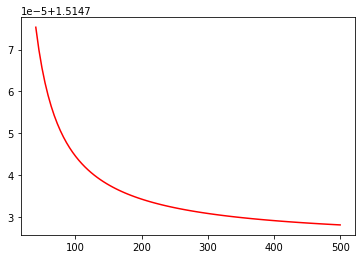

In [ ]:
plt.plot(lamda_inv, Val_RMSE, color='red')
plt.show()

The changes in RMSE value are very insignificant. Let's validate this observation further by increasing the range as 400 to 5000.

In [ ]:
lamda_inv = np.linspace(400, 5000, 200)
Val_RMSE, Train_RMSE = [], []
for l_inv in lamda_inv:
  # calculate optimum w using Pseudo_Inverse method
  w_op = Pseudo_Inverse (x_train, t_train, 1/l_inv)
  # calc validation rmse and training rmse
  Val_RMSE.append(np.sqrt(MSE_Loss(x_val, t_val, w_op)))
  Train_RMSE.append(np.sqrt(MSE_Loss(x_train, t_train, w_op)))

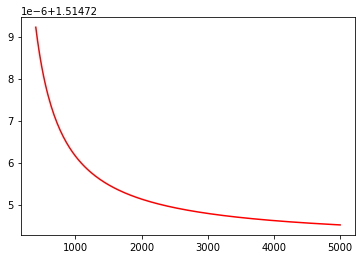

In [ ]:
plt.plot(lamda_inv, Val_RMSE, color='red')
plt.show()

Just to be on safe side, lets now validate our observation that changes in validation rmse curve become highly insignificant for larger ranges, for a pretty wide range of 5000 to 5e+8.

In [ ]:
lamda_inv = np.linspace(5000, 5e+8, 400)
Val_RMSE, Train_RMSE = [], []
for l_inv in lamda_inv:
  # calculate optimum w using Pseudo_Inverse method
  w_op = Pseudo_Inverse (x_train, t_train, 1/l_inv)
  # calc validation rmse and training rmse
  Val_RMSE.append(np.sqrt(MSE_Loss(x_val, t_val, w_op)))
  Train_RMSE.append(np.sqrt(MSE_Loss(x_train, t_train, w_op)))

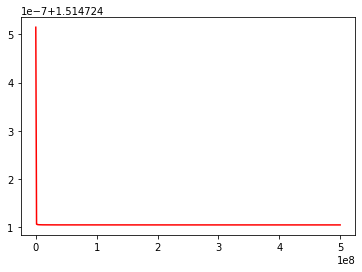

In [ ]:
plt.plot(lamda_inv, Val_RMSE, color='red')
plt.show()

### **Observation**
Clearly as observed from the last 3 curves, the validation RMSE curve changes on the scale 1e-5, 1e-6 and 1e-7 as we keep increasing the range. These changes are insignificant.

These small changes happen around RMSE = 1.5147.

### **Inference**

Above implies that after a certain value of 1/lamda, variations in the validation rmse curve obtained by pseudo inverse method, are highly insignificant. 

Although being insignificant, there is still a decreasing nature of the curve.

Most plausible reasons are that the overall training data was normalised before splitting, which might have made model already familiar with validation data or

that the problem itself is too simple that even with increasing model complexity to very large values, **there is no noticeable effect of overfitting.**

This nature not being observed in the previous sections could be attributed to the use of an approximate first order gradient descent algorithm for optimization.

### **Selecting the Best Lamda**
The best value of lamda_inv now should be the least value at which the RMSE hits around 1.5147.

Taking a look at the first curve, plausible candidates seem to be lie in the range 10-40. Let's plot the validation rmse for this range to make a better choice.

In [ ]:
lamda_inv = np.linspace(10, 40, 400)
Val_RMSE, Train_RMSE = [], []
for l_inv in lamda_inv:
  # calculate optimum w using Pseudo_Inverse method
  w_op = Pseudo_Inverse (x_train, t_train, 1/l_inv)
  # calc validation rmse and training rmse
  Val_RMSE.append(np.sqrt(MSE_Loss(x_val, t_val, w_op)))
  Train_RMSE.append(np.sqrt(MSE_Loss(x_train, t_train, w_op)))

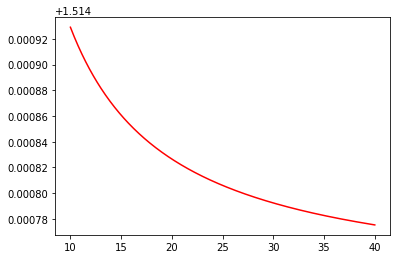

In [ ]:
plt.plot(lamda_inv, Val_RMSE, color='red')
plt.show()

Now, it seems like we have a lot of choices for lamda. Inclining towards the least plausible choice of 1/lamda where the curve hits around 1.5147, Let's choose 1/lamda = 25 and validae the same

In [ ]:
# calculate optimum w using Pseudo_Inverse method
w_op = Pseudo_Inverse (x_train, t_train, 1/l_inv)
# calc validation rmse and training rmse
np.sqrt(MSE_Loss(x_val, t_val, w_op))

1.5147753100334513

Clearly, this works as expected. Lets fix this value for 1/lamda and save and print the final results.

### **Conclusion**

A plausible choice for **Best Lamda** is 1/25 = 0.04 with validation RMSE approximately 1.51477

In [ ]:
# save and print the final weight vector, validation rmse and nrmse for Pseuod inverse method
lamda_best_pseudo = 1/25
w_best_pseudo = Pseudo_Inverse (x_train, t_train, lamda_best_pseudo)
best_val_RMSE_pseudo = np.sqrt(MSE_Loss(x_val, t_val, w_best_pseudo))
best_val_NRMSE_pseudo = NRMSE_Metric(x_val, t_val, w_best_pseudo)

print('optimum w :\n', w_best_pseudo)
print('\nValidation RMSE : ', best_val_RMSE_pseudo)
print('Validation NRMSE : ', best_val_NRMSE_pseudo)

optimum w :
 [ 4.42070681e-01  8.13953552e-02  5.12325497e-01 -1.48612276e-01
  2.02737855e+00  1.37015493e-01 -3.69194512e-01  2.71529778e-01
 -4.01522703e-01 -1.21480830e-01 -1.57017882e-01 -3.06816782e-01
 -8.77656272e-02  1.97705773e-01 -3.20437568e-02  1.82600463e-02
 -7.65143537e-02 -1.26840047e-01 -2.28897495e-01  2.83805551e-01
  1.05799945e-01  3.02274985e+01]

Validation RMSE :  1.5148060468067912
Validation NRMSE :  0.402590350284845


## **The Best Models so far**
Following are thre best models tabulated along with the relevant details of loss functions and minimization technique.

In [ ]:
table_models = {'Loss Function': ['L2', 'L1', 'L2'], 'Optimization method': ['Gradient Descent', 'Gradient Descent', 'Pseudo inverse (Analytical soln)'], 
                'Best Lamda':[lamda_best_L2, lamda_best_L1, lamda_best_pseudo ], 'Best Validation RMSE': [best_val_RMSE_L2, best_val_RMSE_L1, best_val_RMSE_pseudo]}
df_best_models = pd.DataFrame(table_models)
df_best_models

,Loss Function,Optimization method,Best Lamda,Best Validation RMSE
0,L2,Gradient Descent,0.090164,1.486896
1,L1,Gradient Descent,0.047115,1.492034
2,L2,Pseudo inverse (Analytical soln),0.040000,1.514806


## **Best Model**

Clearly, **"L2 loss function"** ***optimized by Gradient Descent*** gives the best validation RMSE (**1.486**)and thus the best model.

Next we use the weight vector **"w_best_L2"** for prediction on test data.

# Predictions on **Test Data**

---

In [ ]:
# read test data from the given link
df_test = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv")

In [ ]:
# convert test data to numpy array
x_test = np.array(df_test)
# normalise the test data
x_test_norm = Normalize(x_test)

In [ ]:
# Store the test data predictions in Predictions_array
Predictions_array = Prediction(x_test_norm, w_best_L2)

In [ ]:
# Convert the predictions array to a dataframe
df_predictions = pd.DataFrame(Predictions_array, columns = ['Next_Tmax'])
# write to csv file
# df_predictions.to_csv('17d070041_18d070053_1.csv', index = False)

#**... Part 2 ends.**

1. Write the name or roll no.s of friends from outside your group with whom you discussed the assignment here (no penalty for mere discussion without copying code): 
2. Write the links of sources on the internet referred here (no penalty for mere consultation without copying code): 

#### Discussion with friends outside the group :

* Shailee Suryawanshi : 17D070049

### References (Part 1)


*   Joining two numpy arrays : https://www.geeksforgeeks.org/numpy-concatenate-function-python/
*   Vector norm in numpy : https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html


*   signum function in numpy : https://numpy.org/doc/stable/reference/generated/numpy.sign.html

* Conceptual (Gradient descent) : https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression






### References (Part 2)

* Converting pandas DataFrame to numpy array : https://www.geeksforgeeks.org/pandas-dataframe-to_numpy-convert-dataframe-to-numpy-array/

* Splitting dataset into Training and Validation : https://stackoverflow.com/questions/38250710/how-to-split-data-into-3-sets-train-validation-and-test

*  Convert numpy array to csv file:  https://www.geeksforgeeks.org/convert-a-numpy-array-into-a-csv-file/
